
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

## Importar bibliotecas

In [1]:
from pickle import load, dump
from seaborn import pairplot
import matplotlib.pyplot as plt
from seaborn import set as set_
from seaborn import heatmap
from seaborn import relplot
from seaborn import distplot
from pandas import Categorical
from pandas import date_range
#import datetime
from datetime import datetime as dt
from re import sub,findall
from IPython.display import HTML
from wordcloud import WordCloud
#wordcloud = WordCloud().generate(mytext)

from nltk.stem import SnowballStemmer
import nltk
# la primera vez que se imprtar NTKL se debe ejecuatr la siguiente setencia para descargar recursos que utiliza dicha biblioteca
nltk.download('punkt')
nltk.download('stopwords')



#eliminar stopwords de la lista de palabras únicas 
from nltk.corpus import stopwords
#Stopwords-------------------------------------
spanish_stopwords = stopwords.words('spanish') #stop words precargas  de la biblioteca nltk


set_(style="ticks")

import ipywidgets as widgets
from IPython.display import display, HTML
from pandas import read_csv
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Mostrar código", True: "Ocultar código"}




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcssa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcssa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Área de funciones

In [2]:
def normaliza(cadena):
        # elimina tilde de una palabra La palabra debe ser en minúsculas
        # elimina mayúsculas y números de la oración|palabra
        from unicodedata import normalize, category
        return ''.join([x for x in normalize('NFD', cadena) if category(x) == 'Ll'])
    #--------------------------------------------------------------------------------------------------<fin de normaliza() >               
    
def normalizar_string(cadena):
        #normalizar un cadena (secuencia de palabras)
        result = ""
        cadena = cadena.lower().strip()

        for word in cadena.split(" "):
            aux = normaliza(word)
            if len(aux) > 0:
                result = result + ' ' + aux.strip()
            
        return result.strip(' ').strip('\n')
    
    
    
def foo(text):
         #eliminar signos de puntuación
        forbidden = {"¡", "!", " ", ",", ".", ";", ":", "-", "_"}
        return "".join(c for c in text.lower() if c not in forbidden )
    
    
#stemmer = LancasterStemmer()
stemmer = SnowballStemmer('spanish', ignore_stopwords=False)
ignore_words = []

def stem_(string):
    words = nltk.word_tokenize(string.strip())
    return ' '.join([stemmer.stem(w.lower()) for w in words if w not in ignore_words])


def signos(string):
    string = string.split(' ')
    return ' '.join([foo(word.lower()) for word in string ])
    

def remove_stopwprds(string):
    string = string.split(" ")
                
    return ' '.join([word for word in string if word not in spanish_stopwords])




def remove_duplicates(string):
    lista = findall(r'((\w)\2{2,})', string)
    for elemento in lista:
        string = string.replace(elemento[0],elemento[1])
    return string



df_CREA_total = read_csv("Data/CREA_total.csv", sep=',', encoding='iso-8859-1')

palabras = df_CREA_total.values

N = 152558294.0 # suma de todas  las frecuencias absolutas
PALABRAS = dict()

for word,fa,fr in palabras:
    
    PALABRAS[word] = int(fa)

def P(palabra, N=sum(PALABRAS.values())): 
    "Probabilidad de `palabra`."
    
    return PALABRAS[palabra]/N

def correccion(palabra): 
    "Corrección más probable de una palabra."
    #print(candidatos(palabra))
    try:
        return max(candidatos(palabra), key=P)
    except:
        return palabra
    

def candidatos(palabra): 
    "Genera posibles correcciones para una palabra."
    return (conocidas([palabra]) or conocidas(edicion1(palabra)) or conocidas(edicion2(palabra)) or [palabra])

def conocidas(palabras): 
    "El subconjunto de `palabras` que aparecen en el diccionario de PALABRAS."
    #print(set(w for w in palabras if w in PALABRAS))
    return set(w for w in palabras if w in PALABRAS)

def edicion1(palabra):
    "Todas las ediciones que están a una edición de `palabra`."
    letras    = 'abcdefghijklmnopqrstuvwxyzáéíóúüñ'
    divisiones     = [(palabra[:i], palabra[i:])    for i in range(len(palabra) + 1)]
    omisiones    = [L + R[1:]               for L, R in divisiones if R]
    transposiciones = [L + R[1] + R[0] + R[2:] for L, R in divisiones if len(R)>1]
    remplazos   = [L + c + R[1:]           for L, R in divisiones if R for c in letras]
    inserciones    = [L + c + R               for L, R in divisiones for c in letras]
    return set(omisiones + transposiciones + remplazos + inserciones)

def edicion2(palabra): 
    "Todas las ediciones que están a dos ediciones de `palabra`."
    return (e2 for e1 in edicion1(palabra) for e2 in edicion1(e1))


def grammar(string):
    string = string.split() 
    return ' '.join([correccion(word) for word in string if isinstance(word, str) ])


Prueba de funciones 

In [3]:
grammar('hasta me banee para la ocasion')

'hasta me bande para la ocasion'

In [4]:
normalizar_string('Hasta me bañeé para la ocasión 😍😍')

'hasta me banee para la ocasion'

## Diccionario de datos

El dataset cuenta con los campos de:
 - nombre de evento: __Event__  se descarto, es un sólo evento
 - epoch del mensaje: __Epoch__
 - nickname del usuario : __Nickname__ -> se descompuso en dos partes [mail,id]
 - el mensaje: __Message__

## Cargar Datos

In [7]:
# Load data (deserialize)
with open('data/data_cleansing.pickle', 'rb') as handle:
    df = load(handle)

In [8]:
df.head(10)

,Epoch,Message,mail,id
74290,2021-09-07 16:03:45.044,holiiiiiiiiiiiii,artistini@user,8447554
59842,2021-09-14 19:38:30.212,WUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU,MirellAAAAA@user,5678176
75234,2021-09-14 19:43:00.759,a que hora empiezaa,darii@user,3269667
15201,2021-09-14 19:43:27.062,se traba?,VALE@user,6308185
5225,2021-09-14 19:44:38.022,ya merooooo,pichi@user,6578073
34960,2021-09-14 19:44:44.083,que emocionnnn,pichi@user,6578073
29860,2021-09-14 19:45:12.685,:neerme-14:,slpa@user,6612973
85850,2021-09-14 19:45:31.755,OMG,AlexOliva@user,6701317
73606,2021-09-14 19:45:50.342,Artista TE AMOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,mariaaa@user,4699914
94027,2021-09-14 19:45:50.476,Queee,Yessigach@user,6712610


In [9]:
df.tail(10)

,Epoch,Message,mail,id
38764,2021-09-16 23:41:37.346,Tan perfecto,Yes2@user,8176152
17615,2021-09-17 00:12:44.733,v,triss@user,5281226
95007,2021-09-17 00:12:55.432,:neerme-30:,triss@user,5281226
21647,2021-09-17 03:24:22.884,:neerme-30:,Jam8@user,6978791
29166,2021-09-17 14:16:48.101,aun lo pueden verchicos,junto@user,4149018
68520,2021-09-17 14:16:56.244,por que yo si,junto@user,4149018
84614,2021-09-17 19:59:09.682,Sigue disponible ah huevos,Valentina@user,6713890
88281,2021-09-19 17:50:05.529,Amoo,Hiiiiii@user,1297396
35483,2021-09-20 01:28:51.867,33.400,Yessica@user,0879097
26754,2021-09-24 01:34:43.901,Amooo,Jskajjzaba@user,5258798


In [10]:
df.dtypes

Epoch      datetime64[ns]
Message            object
mail               object
id                 object
dtype: object

In [11]:
df.shape

(105171, 4)

## Data time

### Variable `Epoch`

In [22]:
# Valores únicos
df['Epoch'].value_counts()

2021-09-14 20:13:09.525    3
2021-09-14 20:15:08.769    3
2021-09-14 20:08:08.380    3
2021-09-14 20:11:33.266    2
2021-09-14 20:16:48.655    2
                          ..
2021-09-14 20:16:05.722    1
2021-09-14 20:07:48.371    1
2021-09-16 16:16:44.622    1
2021-09-14 20:27:16.357    1
2021-09-15 00:31:53.591    1
Name: Epoch, Length: 104442, dtype: int64

<div class="alert alert-info" role="alert">
    <ul>
        <li> Como es de esperarse en un live streaming , existe más de un comentarios ha una misma hora</li>
    </ul>
</div>

In [23]:
set_(rc={'figure.figsize':(10, 10)})

In [24]:
df['Epoch']

74290   2021-09-07 16:03:45.044
59842   2021-09-14 19:38:30.212
75234   2021-09-14 19:43:00.759
15201   2021-09-14 19:43:27.062
5225    2021-09-14 19:44:38.022
                  ...          
68520   2021-09-17 14:16:56.244
84614   2021-09-17 19:59:09.682
88281   2021-09-19 17:50:05.529
35483   2021-09-20 01:28:51.867
26754   2021-09-24 01:34:43.901
Name: Epoch, Length: 105171, dtype: datetime64[ns]

### Convertir en `index` la variable `timestamp`

In [25]:
df.set_index('Epoch')

,Message,mail,id
Epoch,,,
2021-09-07 16:03:45.044,holiiiiiiiiiiiii,artistini@user,8447554
2021-09-14 19:38:30.212,WUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU,MirellAAAAA@user,5678176
2021-09-14 19:43:00.759,a que hora empiezaa,darii@user,3269667
2021-09-14 19:43:27.062,se traba?,VALE@user,6308185
2021-09-14 19:44:38.022,ya merooooo,pichi@user,6578073
...,...,...,...
2021-09-17 14:16:56.244,por que yo si,junto@user,4149018
2021-09-17 19:59:09.682,Sigue disponible ah huevos,Valentina@user,6713890
2021-09-19 17:50:05.529,Amoo,Hiiiiii@user,1297396


#### Se verifica que la serie temporal está completa

In [26]:
# No aplica, sólo series de tiempo

In [27]:
# Verificar que un índice temporal está completo
# ==============================================================================
#(df.index == date_range(
#                    start = df.index.min(),
#                    end   = df.index.max(),
#                    freq  = df.index.freq)
#).all()

Máximo y mínimo 

In [28]:
df['Epoch'].min()

Timestamp('2021-09-07 16:03:45.044000')

In [29]:
df['Epoch'].max()

Timestamp('2021-09-24 01:34:43.901000')

### Resampleo y conteo de comentarios en intervalos de 10 mins

In [30]:
df_resamp = df.resample('10min', on='Epoch').Epoch.count()

In [31]:
max(df_resamp)

17031

## Gráfica de tendecia

In [32]:
start_date = dt.fromisoformat("2021-09-14 00:00:00")
end_date = dt.fromisoformat("2021-09-18 00:00:00")
filtered_dates = df_resamp[ (df_resamp.index >= start_date) & (df_resamp.index <= end_date)]

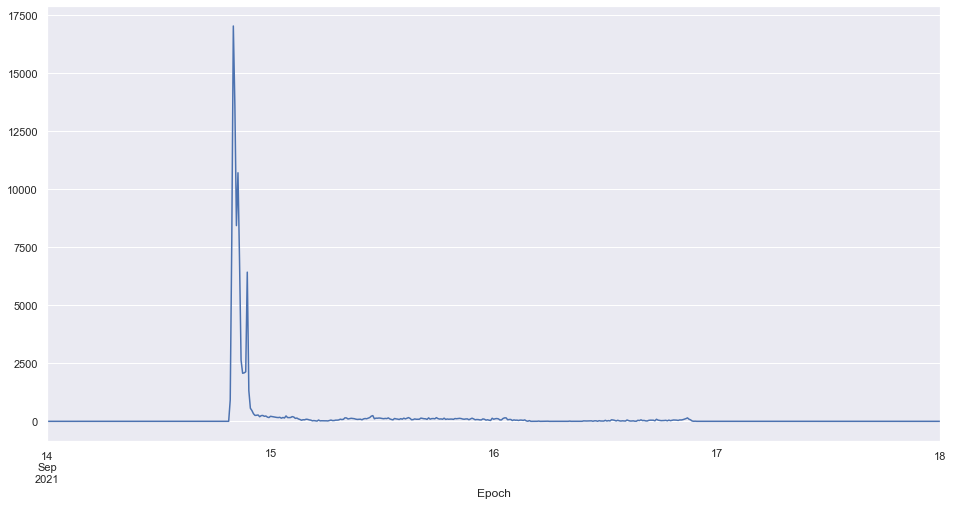

In [33]:
filtered_dates.plot(figsize=(16, 8))

### Zoom al día 14 de septiembre

In [34]:

start_date = dt.fromisoformat("2021-09-14 19:00:00")
end_date = dt.fromisoformat("2021-09-14 22:00:00")
filtered_dates = df_resamp[ (df_resamp.index >= start_date) & (df_resamp.index <= end_date)]

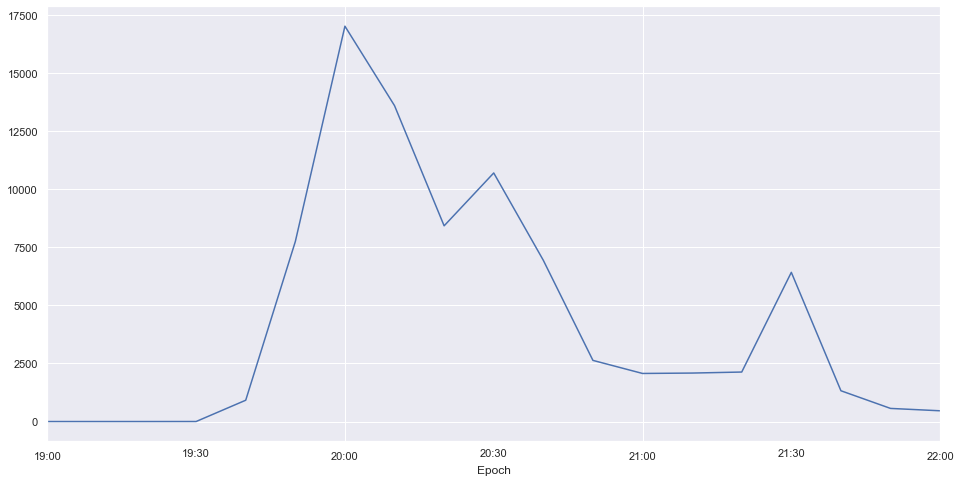

In [35]:
filtered_dates.plot(figsize=(16, 8))

<div class="alert alert-info" role="alert">
    <ul>
        <li> Los comentarios del enevento incian el 14 de septiembre al rededor de las 19:38 y terminan el día 24 a la 1:34</li>
        <li> Se observan tres picos en la gráfica de tendencia</li>
    </ul>
</div>

In [75]:
df_resamp.sort_values(ascending=False)[0:20]

Epoch
2021-09-14 20:00:00    17031
2021-09-14 20:10:00    13608
2021-09-14 20:30:00    10708
2021-09-14 20:20:00     8431
2021-09-14 19:50:00     7754
2021-09-14 20:40:00     6945
2021-09-14 21:30:00     6427
2021-09-14 20:50:00     2634
2021-09-14 21:20:00     2132
2021-09-14 21:10:00     2088
2021-09-14 21:00:00     2071
2021-09-14 21:40:00     1326
2021-09-14 19:40:00      918
2021-09-14 21:50:00      565
2021-09-14 22:00:00      463
2021-09-14 22:10:00      327
2021-09-14 22:40:00      274
2021-09-14 22:30:00      261
2021-09-14 22:20:00      255
2021-09-14 23:10:00      253
Name: Epoch, dtype: int64

<div class="alert alert-info" role="alert">
    <ul>
        <li> El mayor número de comentarios es de 17,031 a las 20:00 hrs   </li>
    </ul>
</div>

## Análisis de texto

In [42]:
df['Message'].unique().size

70246

### Ver mensages

In [43]:
df['Message'].unique().tolist()

['holiiiiiiiiiiiii',
 'WUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU',
 'a que hora empiezaa',
 'se traba?',
 'ya merooooo',
 'que emocionnnn',
 ':neerme-14:',
 'OMG',
 'Artista TE AMOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'Queee',
 ':neerme-4:',
 'DIOOSSS QUE EMOCION!!!',
 '<',
 'que emociooooon!!!!!!!!!!!!!!!!!!',
 'Ya casiii',
 'ya casiiii',
 'estoy en clases flaca pero aqui andooo',
 'omh',
 'coahuila',
 '..?',
 'JAJAJAJA HOLAAAA',
 ':neerme-5:',
 'Que  emocioooooon!!!',
 'Listaaaa',
 ':neerme-30:',
 'ESOOO',
 'te amo mi flacaaaaaaaaaaaaaaaaaa',
 'Estan listos',
 'llegamos temprano',
 'Buenas',
 'Im so happy jaja',
 'hola artistinissss',
 'puro artistini osi osi',
 'JAJAJAJJA',
 'holiii',
 'OMGG',
 'ealeeeeee',
 'hi',
 'Holaaaaaa',
 'Amooooooo, artistaaaa',
 'aaaaa que emocionnnnn',
 'Ya merooo',
 'AAAAAAAAAAA',
 '♥♥♥♥♥♥',
 'holaaa',
 'La KOSSSSS',
 'Pense que eramos las primeras con mis hermanas',
 'HOLAAA',
 'artistiniiiissss',
 'JAJAJJAA',
 'ostiaaa',
 'Ya tamo ready',
 'AMO',
 'HOLAAAAAAA',

In [77]:
df['Message_foo'] = df.Message.apply(lambda message: signos(message))
df['Message_not_duplicates'] = df.Message_foo.apply(lambda message: remove_duplicates(message))


#df['Message_cor'] = df.Message_not_duplicates.apply(lambda message: grammar(message))
#df['Message_stopWords'] = df.Message_cor.apply(lambda message: remove_stopwprds(message))
#df['Message_normalized'] = df.Message_stopWords.apply(lambda message: normalizar_string(message))
#df['Message_stem'] = df.Message_normalized.apply(lambda message: stem_(message))


<div class="alert alert-info" role="alert">
    <ul>
        <li> Es necesario refinar más los filtros , queda fuera del scope debido al tiempo  </li>
        <li> Los comentarios contiene emoticos/emojis los cuales puede ser utiles para las metricas de Engagement 
    </ul>
</div>

In [45]:
df

,Epoch,Message,mail,id,Message_foo,Message_not_duplicates
74290,2021-09-07 16:03:45.044,holiiiiiiiiiiiii,artistini@user,8447554,holiiiiiiiiiiiii,holi
59842,2021-09-14 19:38:30.212,WUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU,MirellAAAAA@user,5678176,wuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu,wu
75234,2021-09-14 19:43:00.759,a que hora empiezaa,darii@user,3269667,a que hora empiezaa,a que hora empiezaa
15201,2021-09-14 19:43:27.062,se traba?,VALE@user,6308185,se traba?,se traba?
5225,2021-09-14 19:44:38.022,ya merooooo,pichi@user,6578073,ya merooooo,ya mero
...,...,...,...,...,...,...
68520,2021-09-17 14:16:56.244,por que yo si,junto@user,4149018,por que yo si,por que yo si
84614,2021-09-17 19:59:09.682,Sigue disponible ah huevos,Valentina@user,6713890,sigue disponible ah huevos,sigue disponible ah huevos
88281,2021-09-19 17:50:05.529,Amoo,Hiiiiii@user,1297396,amoo,amoo
35483,2021-09-20 01:28:51.867,33.400,Yessica@user,0879097,33400,33400


### Comentarios únicos

In [72]:
df.id.nunique()

57636

In [73]:
df.mail.nunique()

28814

### Words Cloud

#### Todos los comentarios del evento

In [47]:
completo_text = ""
    
for row in df['Message_not_duplicates'] : 
    for word in row.split() : 
        completo_text = completo_text + " " + word 

In [49]:
completo_text

' holi wu a que hora empiezaa se traba? ya mero que emocion neerme14 omg artista te amo que neerme4 dioos que emocion < que emocion ya casi ya casi estoy en clases flaca pero aqui ando omh coahuila omg ? jajajaja hola neerme5 que emocion lista neerme30 eso te amo mi flaca estan listos llegamos temprano buenas im so happy jaja hola artistinis puro artistini osi osi jajajajja holi omgg eale hi hola amo artista a que emocion ya mero a neerme30 ♥♥♥♥♥♥ hola neerme30 la kos neerme30 pense que eramos las primeras con mis hermanas hola neerme30 artistinis jajajjaa ostia ya tamo ready amo hola holas neerme15 hola keiosbebe amo recuerden reportar a cuentas que hagan transmisiones uh escuchan algo hola estoy emocianda ah que emoción aqui ppuntuales}jajajaj me puse nerviosa porque no abria mi correo} artista os nuestra diosa o es mi cel amo que nervios siganme en instagram alanahree omaiga que emocionn estoy tan orgullosade nini ya esta a que horas empieza? llegamos temprano plebes estañas ready e

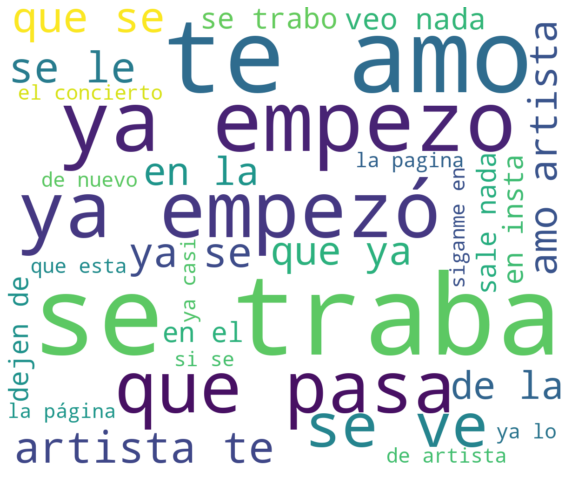

In [50]:
wordcloud = WordCloud(background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 3,
                            max_words=30
                     ).generate(completo_text)   

plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

#### Conteno de palabras del top 10

In [87]:
df[df.Message_not_duplicates.str.contains('empieza')].Message.count()

1995

In [89]:
df[df.Message_not_duplicates.str.contains(r'(.*empiez.*)')].Message.count()

2106

In [90]:
df[df.Message_not_duplicates.str.contains(r'(.*trab.*)')].Message.count()

6131

In [96]:
df[df.Message_not_duplicates.str.contains('artista')].Message.count()

7372

## Medir los momentos clave 

#### Entre 17:50 y 20:10

In [52]:
start_date = dt.fromisoformat("2021-09-14 19:50:00")
end_date = dt.fromisoformat("2021-09-14 20:10:00")
filtered_dates_1 = df[ (df.Epoch >= start_date) & (df.Epoch <= end_date)][['Epoch','Message_not_duplicates']]

In [53]:
filtered_dates_1

,Epoch,Message_not_duplicates
32857,2021-09-14 19:50:00.178,hola
97953,2021-09-14 19:50:00.806,contexto please
80425,2021-09-14 19:50:00.870,neerme6
31743,2021-09-14 19:50:01.359,ah
22703,2021-09-14 19:50:01.513,hola
...,...,...
10221,2021-09-14 20:09:59.858,quedé
45293,2021-09-14 20:09:59.900,y artista aqueora
67549,2021-09-14 20:09:59.915,se me trabo xd
39068,2021-09-14 20:09:59.917,a qué hora mierda empezará(


In [54]:
primer_text = ""
    
for row in filtered_dates_1['Message_not_duplicates'] : 
    for word in row.split() : 
        primer_text = primer_text + " " + word.strip()

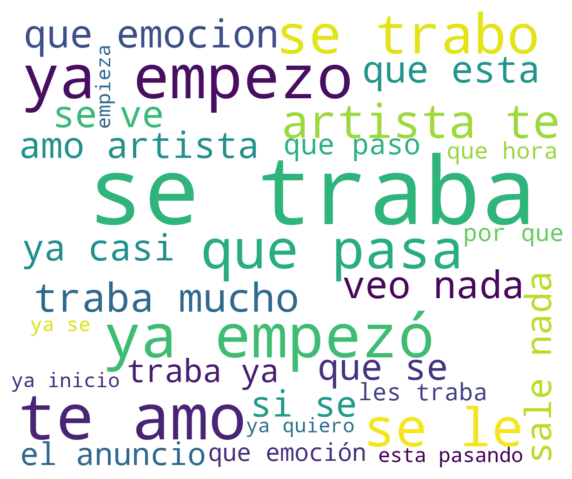

In [55]:
wordcloud = WordCloud(background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 1,
                            max_words=30
                     ).generate(primer_text)   

plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [56]:
filtered_dates_1[filtered_dates_1.Message_not_duplicates.str.contains('empieza')]

,Epoch,Message_not_duplicates
92099,2021-09-14 19:51:24.757,estoy llorando y todabia ni empieza
102891,2021-09-14 19:51:43.786,aúbn no empieza y ya somos más de 3mil persona...
52042,2021-09-14 19:52:03.018,a que hora empieza?}
7941,2021-09-14 19:52:59.807,jajajaja ya empieza
3774,2021-09-14 19:53:01.336,ya empieza
...,...,...
101459,2021-09-14 20:09:53.876,porque no empieza
61442,2021-09-14 20:09:54.152,alguien sabe si en tira empieza hora de mexico
8925,2021-09-14 20:09:55.727,no empieza(
82346,2021-09-14 20:09:58.106,que emoción todavía no empieza y ya me esta gu...


### Segundo momento 

In [92]:
#### Entre 20:29 y 20:31

In [97]:
start_date = dt.fromisoformat("2021-09-14 20:29:00")
end_date = dt.fromisoformat("2021-09-14 20:31:00")
filtered_dates_2 = df[ (df.Epoch >= start_date) & (df.Epoch <= end_date)][['Epoch','Message_not_duplicates']]

In [98]:
filtered_dates_2.shape

(1999, 2)

In [99]:
filtered_dates_2.head(40)

,Epoch,Message_not_duplicates
50759,2021-09-14 20:29:00.008,ya empezó????
103113,2021-09-14 20:29:00.073,neerme5
72481,2021-09-14 20:29:00.102,porque a mi me sale que 0 personas viendo?? a ...
9008,2021-09-14 20:29:00.214,produccion
70564,2021-09-14 20:29:00.258,ay que lío🤭
99520,2021-09-14 20:29:00.378,ya
94953,2021-09-14 20:29:00.477,esow
29035,2021-09-14 20:29:00.479,hola mi ex me dio el boleto
9211,2021-09-14 20:29:00.600,porque a mi me sale trabado
80173,2021-09-14 20:29:00.686,eale


In [59]:
segundo_text = ""
    
for row in filtered_dates_2['Message_not_duplicates'] : 
    for word in row.split() : 
        segundo_text = segundo_text + " " + word.strip()

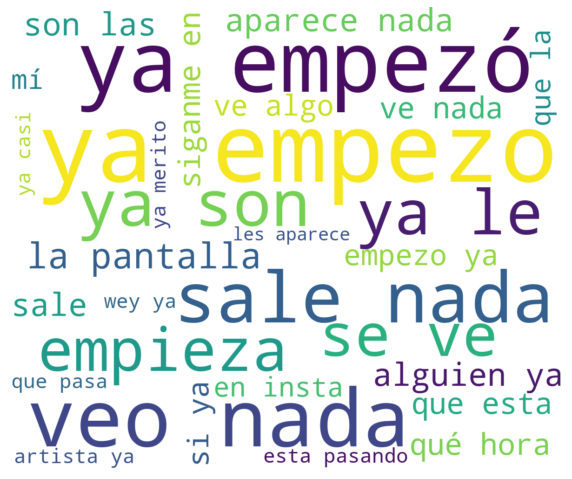

In [60]:
wordcloud = WordCloud(background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 3,
                            max_words=30
                     ).generate(segundo_text)   

plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

### Tercer momento

In [61]:
start_date = dt.fromisoformat("2021-09-14 21:31:00")
end_date = dt.fromisoformat("2021-09-14 21:32:00")
filtered_dates_3 = df[ (df.Epoch >= start_date) & (df.Epoch <= end_date)][['Epoch','Message_not_duplicates']]

In [62]:
filtered_dates_3

,Epoch,Message_not_duplicates
32551,2021-09-14 21:31:00.108,a veda se asustaron
81447,2021-09-14 21:31:00.127,te amo todo fue perfecto eres la mejor
24487,2021-09-14 21:31:00.135,te amo
10672,2021-09-14 21:31:00.253,salavrg
8248,2021-09-14 21:31:00.463,arriba cócteles q canción tan preciosa qlv
...,...,...
41729,2021-09-14 21:31:59.574,q tema es?
38523,2021-09-14 21:31:59.657,no mames wey estoy llorando
89836,2021-09-14 21:31:59.697,nueva cancion
41284,2021-09-14 21:31:59.851,shock


In [63]:
tercero_text = ""
    
for row in filtered_dates_3['Message_not_duplicates'] : 
    for word in row.split() : 
        tercero_text = tercero_text + " " + word.strip()

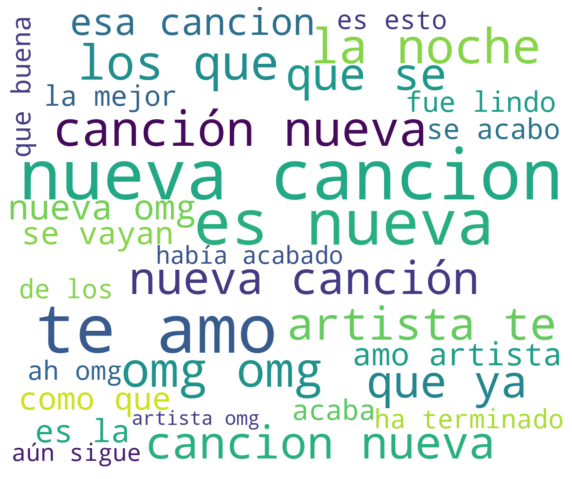

In [64]:
wordcloud = WordCloud(background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 3,
                            max_words=30
                     ).generate(tercero_text)   

plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [65]:
filtered_dates_3[filtered_dates_3.Message_not_duplicates.str.contains('acabo')]

,Epoch,Message_not_duplicates
8332,2021-09-14 21:31:01.824,no como que acabo ni disfrute (
9960,2021-09-14 21:31:02.571,ya se acabo
81252,2021-09-14 21:31:03.779,enserio acabo?
71645,2021-09-14 21:31:14.737,pense que acabo ah casi me salgo
82178,2021-09-14 21:31:22.541,con cual cancion acabo?
75218,2021-09-14 21:31:38.657,se fueron pensando que se acabo
85329,2021-09-14 21:31:55.509,aun no se acabo pendejos dejen de criticar


In [66]:
filtered_dates_3[filtered_dates_3.Message_not_duplicates.str.contains('nueva')]

,Epoch,Message_not_duplicates
22540,2021-09-14 21:31:01.177,nueva
98288,2021-09-14 21:31:03.736,nueva canción
9837,2021-09-14 21:31:09.640,nueva cancion
19212,2021-09-14 21:31:09.917,nueva cancion
15186,2021-09-14 21:31:10.644,cancion nueva
...,...,...
7147,2021-09-14 21:31:58.390,esa cancion es nueva? omg
81925,2021-09-14 21:31:58.485,saco nueva cancion a
19459,2021-09-14 21:31:58.982,que buena nueva cancion
33759,2021-09-14 21:31:59.393,nueva cancion


In [67]:
filtered_dates_3.columns

Index(['Epoch', 'Message_not_duplicates'], dtype='object')

### Cuarto momento

In [68]:
start_date = dt.fromisoformat("2021-09-14 22:00:00")
end_date = dt.fromisoformat("2021-09-14 22:10:00")
filtered_dates_4 = df[ (df.Epoch >= start_date) & (df.Epoch <= end_date)][['Epoch','Message_not_duplicates']]

In [69]:
filtered_dates_4.tail(40)

,Epoch,Message_not_duplicates
83620,2021-09-14 22:09:24.925,e ya salganse si ya lo viero
48242,2021-09-14 22:09:25.151,regreso folow ahre d
73874,2021-09-14 22:09:27.014,nadie los quiere segir retrasados
60957,2021-09-14 22:09:28.183,siganme @salmaordonez
18691,2021-09-14 22:09:28.896,siganme en insta <3 @saoriquintero
65624,2021-09-14 22:09:29.325,por favor quien ya lo vio dejnos qu a los ques...
65016,2021-09-14 22:09:30.499,ig nadiac
102815,2021-09-14 22:09:30.637,@beninipi
33989,2021-09-14 22:09:30.710,ig yamilkasa
33531,2021-09-14 22:09:30.885,no comenten para poder ver el concierto


In [70]:
cuarto_text = ""
    
for row in filtered_dates_4['Message_not_duplicates'] : 
    for word in row.split() : 
        cuarto_text = cuarto_text + " " + word.strip()

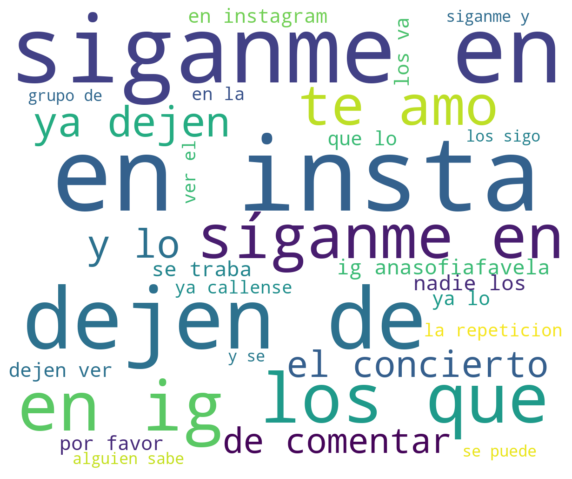

In [71]:
wordcloud = WordCloud(background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 3,
                            max_words=30
                     ).generate(cuarto_text)   

plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

<div class="alert alert-info" role="alert">
    <ul>
        <li> El dataset contiene emojis/emoticos, por tal se puede utilizar un efoque hibrido de análisis de emociones</li>
        <li> El análisis de emociones incrementa el rendimiendo de un 6% a 10% según estudios, desafortunadamente por cuestiones de tiempo esta fuera del alcance de este PoC </ul>
</div>

## Almacenamiento de datos

In [ ]:
### Estimización y 